### Задание 1: Работа с массивами NumPy

#### Цель: Проверить знание методов NumPy для анализа данных.

Задание:

    Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].
    Найдите:
    Среднее арифметическое массива.
    Медиану.
    Стандартное отклонение.
    Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

Ожидаемый ответ:

    Вывод среднего, медианы, стандартного отклонения.
    Новый массив и его фильтр.

Балл: 6

In [1]:
import numpy as np

random_array = np.random.randint(10, 101, size=50) # Создание массива из 50 чисел в диапозоне от 10 до 100
print("Исходный массив случайных чисел:")
print(random_array)

mean_value = np.mean(random_array) # Находим среднее арифмитическое
print("\nСреднее арифметическое массива:")
print(mean_value)

mediana = np.median(random_array) # находим медиану
print("\nМедиана массива:")
print(mediana)

std_dev = np.std(random_array) # Находим стандартное отклонение
print("\nСтандартное отклонение массива:")
print(std_dev)

div_3_array = random_array / 3 # Создание массива из чисел, разделенных на 3
print("\nНовый массив из числе делящихся на 3:")
print(div_3_array)


div_3_array = div_3_array[random_array % 3 == 0] # Фильт чисел, делящихся на 3 без остатка
print("\n массив из чисел, отфильтрованные по делению на 3 без остатка (после деления):")
print(div_3_array)


Исходный массив случайных чисел:
[ 50  56  95  94  79  18  62  83  94  34  24  27  23  88  61  42  77  33
  88  18  27  49  94  12  75  79  59  43  34  63  89  95  77  64  95  70
  29  57  48  94  61  18  79  35  36  87  64  29  79 100]

Среднее арифметическое массива:
59.74

Медиана массива:
61.5

Стандартное отклонение массива:
26.307268957457364

Новый массив из числе делящихся на 3:
[16.66666667 18.66666667 31.66666667 31.33333333 26.33333333  6.
 20.66666667 27.66666667 31.33333333 11.33333333  8.          9.
  7.66666667 29.33333333 20.33333333 14.         25.66666667 11.
 29.33333333  6.          9.         16.33333333 31.33333333  4.
 25.         26.33333333 19.66666667 14.33333333 11.33333333 21.
 29.66666667 31.66666667 25.66666667 21.33333333 31.66666667 23.33333333
  9.66666667 19.         16.         31.33333333 20.33333333  6.
 26.33333333 11.66666667 12.         29.         21.33333333  9.66666667
 26.33333333 33.33333333]

 массив из чисел, отфильтрованные по делению на

### Задание 2: Анализ данных с помощью Pandas

#### Цель: Проверить навыки анализа и обработки данных.

Данные: Используйте предоставленный CSV-файл ("sales_data_large.csv"), содержащий данные о продажах с полями:

    date (дата продаж),
    region (регион),
    product (продукт),
    sales (объем продаж).

Задание:

    Загрузите данные из файла.
    Определите:
    Общее количество записей.
    Какие регионы и продукты присутствуют в данных.
    Подсчитайте:
    Общие продажи по регионам.
    Средний объем продаж для каждого продукта.
    Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.

Ожидаемый ответ:

    Итоги анализа данных.
    Построенная сводная таблица.

Балл: 9

In [2]:
import pandas as pd
df = pd.read_csv("sales_data_large.csv")

In [3]:
df.head(5) # Вывод первых 5 записей в датафрейме

,date,region,product,sales
0,2024-12-01,West,Widget C,246
1,2024-12-01,South,Widget B,152
2,2024-12-01,West,Widget B,391
3,2024-12-01,West,Widget A,272
4,2024-12-01,East,Widget A,337


In [4]:
df.info() # Общее количество записей. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     500 non-null    object
 1   region   500 non-null    object
 2   product  500 non-null    object
 3   sales    500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


Общее количество записей: 500

In [5]:
print(df['region'].unique())
print(df['product'].unique())

['West' 'South' 'East' 'North']
['Widget C' 'Widget B' 'Widget A']


В датасете представлены сведения о регионах: West, South, East, Norht
В датасете представлены сведения о продуктах: Widget C, Widget B, Widgwt A


In [6]:
# Сумма продаж по каждому региону
region_sales = df.groupby('region')['sales'].sum()
region_sales


region
East     29244
North    39605
South    33023
West     35171
Name: sales, dtype: int64

In [7]:
# Средние значения продаж для каждого продукта
product_sales_mean = df.groupby('product')['sales'].mean()
product_sales_mean


product
Widget A    275.424242
Widget B    268.331361
Widget C    278.614458
Name: sales, dtype: float64

In [8]:
# Показатели средних значений продаж для каждого региона для каждого вида товара
table_sales = df.pivot_table(values='sales', index='region', columns='product', aggfunc='mean')
table_sales


product,Widget A,Widget B,Widget C
region,,,
East,291.464286,263.116279,271.361111
North,289.145833,238.477273,304.660000
South,277.380952,282.833333,263.722222
West,250.106383,291.550000,267.136364


### Задание 3: Очистка данных и визуализация

#### Цель: Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.

Данные: Используйте предоставленный CSV-файл ("sales_cleaning_large.csv"), содержащий данные о продажах с возможными пропущенными и некорректными значениями. Поля:

    date (дата продаж),
    sales (объем продаж),
    region (регион).

Задание:

    Найдите и устраните ошибки в данных:
    Заполните пропущенные даты.
    Удалите отрицательные значения в столбце sales или замените их на медиану столбца.
    Заполните пропущенные значения в sales средним значением.
    Постройте график продаж по датам. Убедитесь, что даты упорядочены.

Ожидаемый ответ:

    Обработанный DataFrame.
    Построенный график.

Балл: 10

In [9]:
df = pd.read_csv("sales_cleaning_large.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    190 non-null    object 
 1   sales   190 non-null    float64
 2   region  200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


Из представленной информации видно, что из 200 записей 190 записей не содержат пропуски.


In [10]:
# Проверям данные данные в сдолбце data
df['date'].unique()

array(['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04',
       '2024-12-05', '2024-12-06', '2024-12-07', '2024-12-08',
       '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
       '2024-12-13', '2024-12-14', '2024-12-15', '2024-12-16',
       '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
       '2024-12-21', '2024-12-22', '2024-12-23', '2024-12-24',
       '2024-12-25', '2024-12-26', '2024-12-27', '2024-12-28',
       '2024-12-29', '2024-12-30', '2024-12-31', nan], dtype=object)

Из анализа данных столбца "data" следует, что они представляют собой данные за декабрь месяц 2024 года.
При этом видно, что сведения о датах содержат пропущенные даты. Далее следует посмотреть какие данные в столбце date содержат пропуски.

In [11]:
# Пропуски значений в столбце "data"
missing_values = df[df['date'].isnull()]
missing_values


,date,sales,region
190,NaN,150.0,South
191,NaN,-500.0,West
192,NaN,50.0,West
193,NaN,350.0,South
194,NaN,-350.0,South
195,NaN,400.0,West
196,NaN,-150.0,West
197,NaN,-500.0,South
198,NaN,-350.0,East
199,NaN,-50.0,North


Из анализа следует, что в представленных данных помимо пропущенных данных в столбце "data" присутсвуют отрицательные данные в сталбце "sales", что можно отнести к ошибкам.
Далее, следует посомтреть количество уникальных значений в столбце "sales"

In [12]:
# Проверям данные данные в сдолбце sales
df['sales'].unique()

array([-450.,  400., -100.,  350.,   50.,  250.,  -50., -250., -200.,
       -150.,   nan,  100., -300., -350.,    0.,  200., -500.,  450.,
        300.,  150., -400.])

Как видим в данных представлены 4 категории значений: положительные значения, отрицательные значения, значения 0, пропущенные значения.
Ошибочными значениями следует признать отрицательные значения и пропущенные значения. Следует принять оптимальное решение для данных, содержащих ошибки.

In [13]:
zeros = df[df['sales']  < 0]
zeros

,date,sales,region
0,2024-12-01,-450.0,East
2,2024-12-01,-100.0,South
7,2024-12-02,-50.0,South
8,2024-12-02,-250.0,West
9,2024-12-02,-450.0,South
...,...,...,...
194,NaN,-350.0,South
196,NaN,-150.0,West
197,NaN,-500.0,South
198,NaN,-350.0,East


In [14]:
sales_none= df[df['sales'].isnull()]
sales_none

,date,sales,region
15,2024-12-03,NaN,South
23,2024-12-04,NaN,South
33,2024-12-06,NaN,North
43,2024-12-07,NaN,East
83,2024-12-13,NaN,West
84,2024-12-13,NaN,West
92,2024-12-15,NaN,North
107,2024-12-17,NaN,North
112,2024-12-18,NaN,East
165,2024-12-28,NaN,West


Количество записей в столбце "sales", содержащие отрицательные значения, составляет 89. П Кроме, существуют записи в столбце "salse", в которых значения отсутсвуют, значение которых составляет 10 записей. Таким образом нужно обработать 99 некорретных записий. Учитывая количество некорректных записей разумной стратегией представляется заполнение их значениями, на основе имеющихся. 
В качестве решение предлагается слдеюущий подход:
- Пропущенные значения дата заполнять случайным образом из значений, имеющихся в датасете. Такой подход позволит сохраить равномерность распределения событий.
- Пропущенные и отрицательные значения в столбце "sale" предлагается заполнить средним значением.

In [15]:
# Сортировка столюца "data"

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
date_range = pd.date_range

In [16]:
# Определяем полный диапазон дат
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())

# Замена пустых знгачений на случайно выбранное значение из диапозона дат
df['date'] = df['date'].apply(lambda x: np.random.choice(date_range) if pd.isnull(x) else x)

# После преобразования датасет выглядит следующим образом
df['date'].unique()

<DatetimeArray>
['2024-12-01 00:00:00', '2024-12-02 00:00:00', '2024-12-03 00:00:00',
 '2024-12-04 00:00:00', '2024-12-05 00:00:00', '2024-12-06 00:00:00',
 '2024-12-07 00:00:00', '2024-12-08 00:00:00', '2024-12-09 00:00:00',
 '2024-12-10 00:00:00', '2024-12-11 00:00:00', '2024-12-12 00:00:00',
 '2024-12-13 00:00:00', '2024-12-14 00:00:00', '2024-12-15 00:00:00',
 '2024-12-16 00:00:00', '2024-12-17 00:00:00', '2024-12-18 00:00:00',
 '2024-12-19 00:00:00', '2024-12-20 00:00:00', '2024-12-21 00:00:00',
 '2024-12-22 00:00:00', '2024-12-23 00:00:00', '2024-12-24 00:00:00',
 '2024-12-25 00:00:00', '2024-12-26 00:00:00', '2024-12-27 00:00:00',
 '2024-12-28 00:00:00', '2024-12-29 00:00:00', '2024-12-30 00:00:00',
 '2024-12-31 00:00:00']
Length: 31, dtype: datetime64[ns]

In [17]:
print(df[df['sales'].isnull()])
df['sales'].unique()

          date  sales region
15  2024-12-03    NaN  South
23  2024-12-04    NaN  South
33  2024-12-06    NaN  North
43  2024-12-07    NaN   East
84  2024-12-13    NaN   West
83  2024-12-13    NaN   West
92  2024-12-15    NaN  North
107 2024-12-17    NaN  North
112 2024-12-18    NaN   East
165 2024-12-28    NaN   West


array([-450.,  400., -100.,  350., -200., -250.,  -50.,  250.,   50.,
       -150.,   nan,  100., -300.,    0., -350.,  200., -500.,  300.,
        450.,  150., -400.])

In [18]:
# Определеим значение среднего для всех положительных значений в столбце "salse"
for_median_sales = df[df['sales'] >0]
median_sales = for_median_sales['sales'].median(skipna=True)
print(f'медианное значение, которым будут замещены пусыте и отрицательные значения: {median_sales}' )


медианное значение, которым будут замещены пусыте и отрицательные значения: 250.0


In [19]:


# Замена всех отрицательных и пустых значений на значение среднего по столбцу "sales"
df['sales'] = df['sales'].apply(lambda x: median_sales if x < 0 else x)
df['sales'] = df['sales'].fillna(median_sales)

# Убеждаемся, что среди значений столбца "sales" отсутсвуют отрицательные и пустые значения
df['sales'].unique()

array([250., 400., 350.,  50., 100.,   0., 200., 300., 450., 150.])

In [20]:
df = df.sort_values(by='date')
df['date']

0     2024-12-01
1     2024-12-01
2     2024-12-01
3     2024-12-01
198   2024-12-02
         ...    
186   2024-12-31
185   2024-12-31
188   2024-12-31
187   2024-12-31
189   2024-12-31
Name: date, Length: 200, dtype: datetime64[ns]

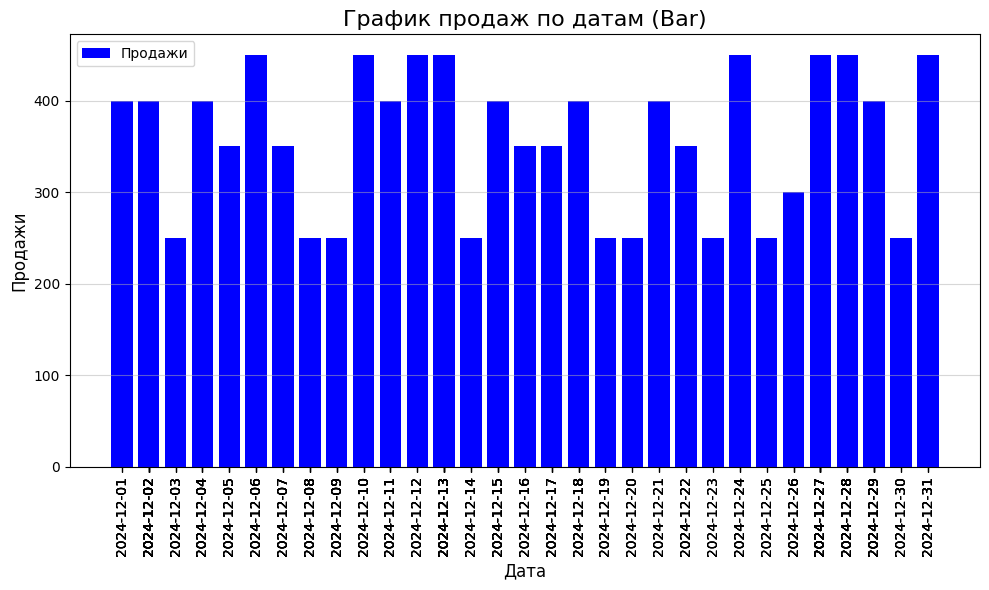

In [33]:
# 4. Построение графика продаж по датам
import matplotlib.pyplot as plt

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(df['date'], df['sales'], color='blue', label='Продажи')
plt.title('График продаж по датам (Bar)', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.xticks(df['date'], rotation=45)  
plt.xticks(rotation=90)  # Поворот меток на 90 градусов
plt.grid(axis='y', alpha=0.5) 
plt.legend() # Отображение легенды
plt.tight_layout()
plt.show()

### Задание 4: Получение данных из API

#### Цель: Проверить способность работать с веб-данными.

Задание:

    Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).
    Загрузите данные и создайте DataFrame с полями: id, name, email, company_name.
    Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".

Ожидаемый ответ:

    DataFrame с результатами фильтрации.

Балл: 6

In [ ]:
import pandas as pd
import requests

# Загружаем данные по указанному источнику
url = "https://jsonplaceholder.typicode.com/users"

response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

# Проверяем, что данные доступны для работы
df

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"{'street': 'Norberto Crossing', 'suite': 'Apt....",1-477-935-8478 x6430,ola.org,"{'name': 'Considine-Lockman', 'catchPhrase': '..."
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"{'street': 'Rex Trail', 'suite': 'Suite 280', ...",210.067.6132,elvis.io,"{'name': 'Johns Group', 'catchPhrase': 'Config..."
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"{'street': 'Ellsworth Summit', 'suite': 'Suite...",586.493.6943 x140,jacynthe.com,"{'name': 'Abernathy Group', 'catchPhrase': 'Im..."
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"{'street': 'Dayna Park', 'suite': 'Suite 449',...",(775)976-6794 x41206,conrad.com,"{'name': 'Yost and Sons', 'catchPhrase': 'Swit..."
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"{'street': 'Kattie Turnpike', 'suite': 'Suite ...",024-648-3804,ambrose.net,"{'name': 'Hoeger LLC', 'catchPhrase': 'Central..."


In [44]:

# Формируем новый Dataframe 
# Создаем новый столец, содержащий имена команий
df['company_name'] = df['company'].apply(lambda x: x['name'])
# Формируем новый даатфрейм с со столбцами по условию
new_df = df[['id', 'name', 'email', 'company_name']]
    
# Фильтруем столбец "company name", название которых содержит "Group"
new_df_filter = new_df[new_df['company_name'].str.contains("Group", case=False, na=False)]
    
# Вывод результата
print("Пользователи, работающие в компаниях, в названии которых содержится слово: 'Group':")
new_df_filter

Пользователи, работающие в компаниях, в названии которых содержится слово: 'Group':


,id,name,email,company_name
6,7,Kurtis Weissnat,Telly.Hoeger@billy.biz,Johns Group
7,8,Nicholas Runolfsdottir V,Sherwood@rosamond.me,Abernathy Group
